In [2]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats:

In [3]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [4]:
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

In [5]:
head(meta, n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [6]:
## Need taxonomy and counts as matrices
taxo_mat <- POR_taxo_4_analysis %>%
  rownames_to_column %>%
  filter(rowname != 'ASV_2') %>%
  column_to_rownames("rowname")
count_mat <- as.matrix(POR_counts_4_analysis)

In [7]:
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27533 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27533 taxa by 7 taxonomic ranks ]

In [8]:
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [9]:
microbiome::summarize_phyloseq(ps)

Compositional = NO2

1] Min. number of reads = 4932] Max. number of reads = 2660663] Total number of reads = 194734094] Average number of reads = 53645.75482093665] Median number of reads = 395717] Sparsity = 0.9856791934827226] Any OTU sum to 1 or less? YES8] Number of singletons = 679] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)0.14528020920350110] Number of sample variables are: 54collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 493"

[[2]]
[1] "2] Max. number of reads = 266066"

[[3]]
[1] "3] Total number of reads = 19473409"

[[4]]
[1] "4] Average number of reads = 53645.7548209366"

[[5]]
[1] "5] Median number of reads = 39571"

[[6]]
[1] "7] Sparsity = 0.985679193482722"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 67"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0.145280209203501"

[[10]]
[1] "10] Number of sample variables are: 54"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

In [11]:
ps_fill = filter_taxa(ps_fill_euk, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

In [12]:
microbiome::summarize_phyloseq(ps_fill)

Compositional = NO2

1] Min. number of reads = 4592] Max. number of reads = 2578903] Total number of reads = 152136104] Average number of reads = 41910.77134986235] Median number of reads = 313047] Sparsity = 0.6539136822773196] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 54collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 459"

[[2]]
[1] "2] Max. number of reads = 257890"

[[3]]
[1] "3] Total number of reads = 15213610"

[[4]]
[1] "4] Average number of reads = 41910.7713498623"

[[5]]
[1] "5] Median number of reads = 31304"

[[6]]
[1] "7] Sparsity = 0.653913682277319"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 54"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

In [13]:
ps_ra <- microbiome::transform(ps_fill, 'compositional')
psr_ra_ord <- ordinate(ps_ra, "NMDS", "bray")

Run 0 stress 0.2526891 
Run 1 stress 0.2529714 
... Procrustes: rmse 0.01028256  max resid 0.1652904 
Run 2 stress 0.2605296 
Run 3 stress 0.2532695 
Run 4 stress 0.2582458 
Run 5 stress 0.2547242 
Run 6 stress 0.2533402 
Run 7 stress 0.2533197 
Run 8 stress 0.2593697 
Run 9 stress 0.2542727 
Run 10 stress 0.2532495 
Run 11 stress 0.2538195 
Run 12 stress 0.2585914 
Run 13 stress 0.2550736 
Run 14 stress 0.2571267 
Run 15 stress 0.2565855 
Run 16 stress 0.2559652 
Run 17 stress 0.2550422 
Run 18 stress 0.2558446 
Run 19 stress 0.2595455 
Run 20 stress 0.2629105 
*** Best solution was not repeated -- monoMDS stopping criteria:
    18: no. of iterations >= maxit
     2: stress ratio > sratmax


In [21]:
#psr_ra_uni <- ordinate(ps_ra, "NMDS", "UniFrac", weighted=FALSE)

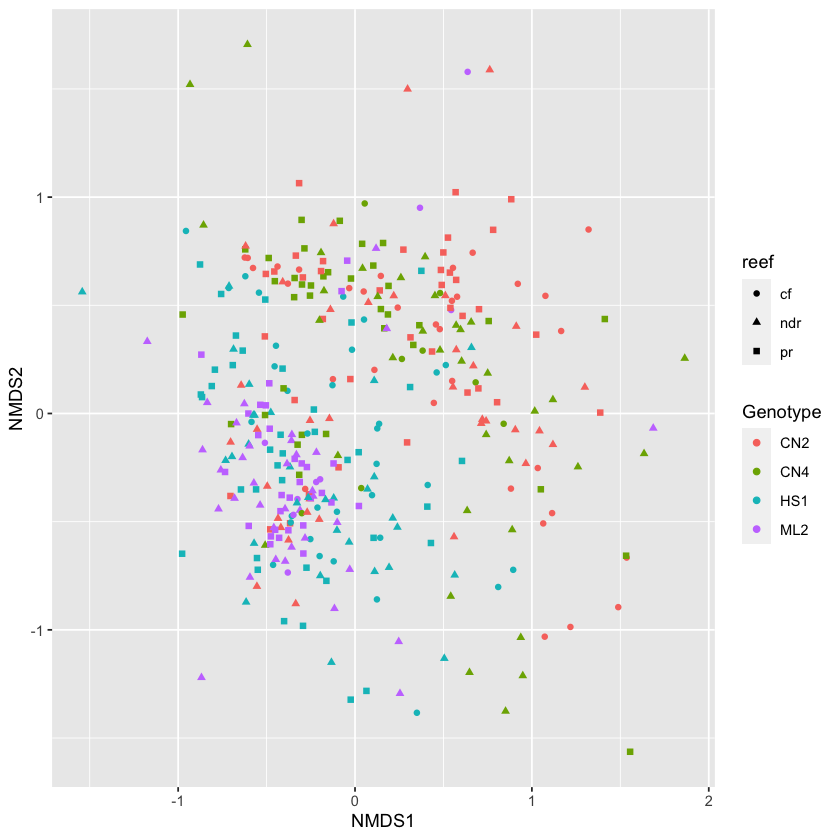

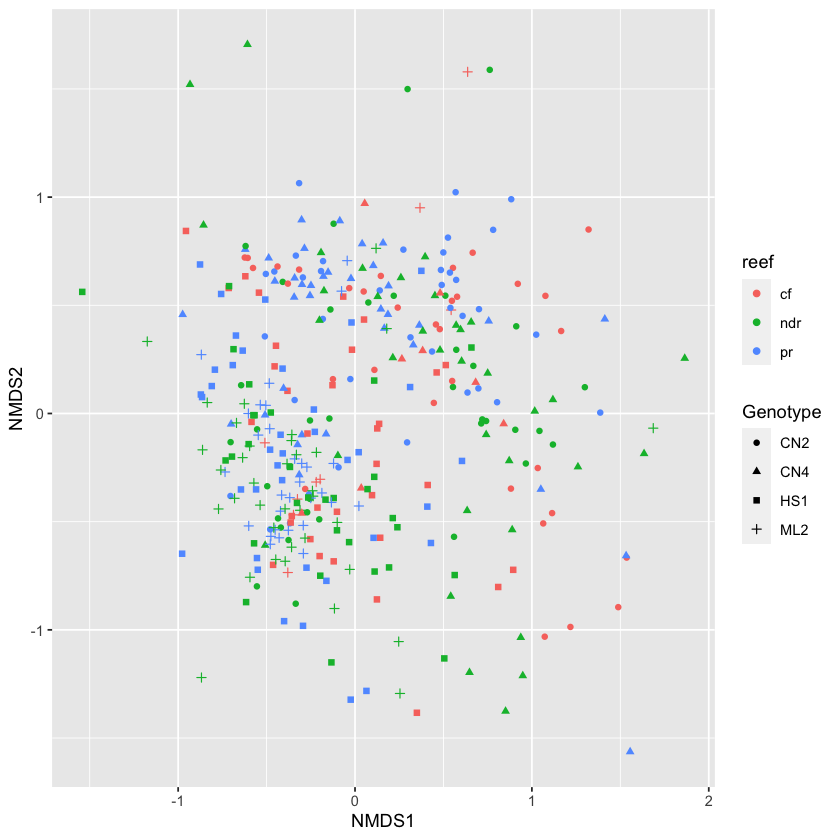

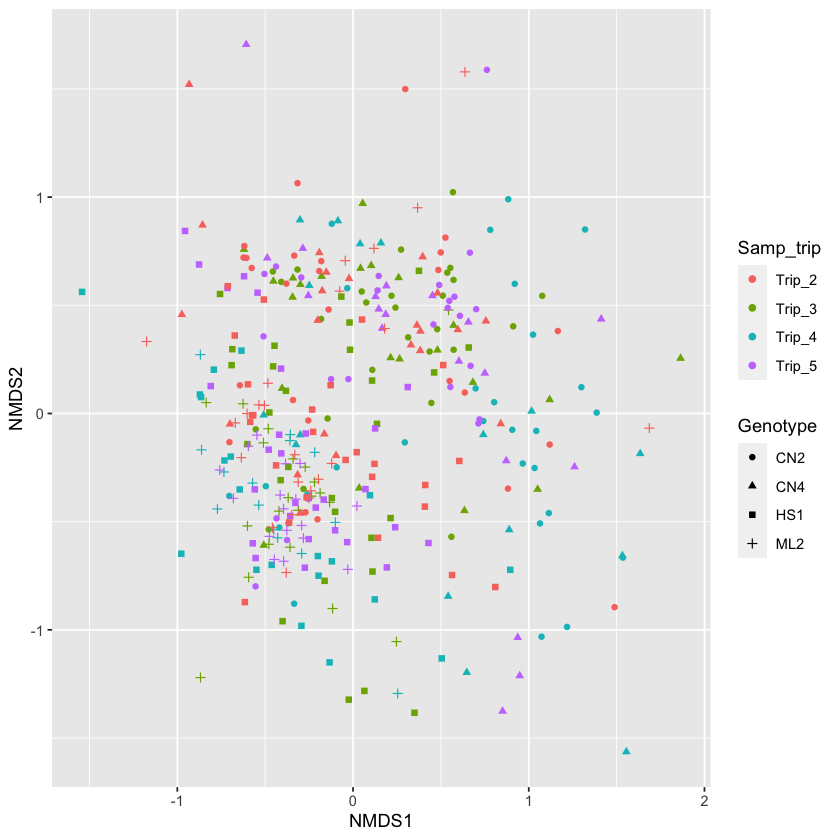

In [15]:
plot_ordination(ps_ra, psr_ra_ord,
                               color="Genotype",
                              shape="reef",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="reef",
                              shape="Genotype",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="Samp_trip",
                              shape="Genotype",
                            axes = c(1,2))


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Genotype)

No. of Positive Eigenvalues: 144
No. of Negative Eigenvalues: 218

Average distance to median:
   CN2    CN4    HS1    ML2 
0.5210 0.5143 0.4586 0.3742 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
21.924 15.059  9.879  6.897  6.329  5.284  4.002  3.448 

[1] 363   1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff         lwr          upr     p adj
CN4-CN2 -0.006744507 -0.05600244  0.042513427 0.9848419
HS1-CN2 -0.062442122 -0.10839432 -0.016489921 0.0028576
ML2-CN2 -0.146885506 -0.19689337 -0.096877640 0.0000000
HS1-CN4 -0.055697615 -0.10546569 -0.005929545 0.0212822
ML2-CN4 -0.140140999 -0.19367643 -0.086605565 0.0000000
ML2-HS1 -0.084443384 -0.13495381 -0.033932954 0.0001211



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      3  1.135 0.37832 22.857    999  0.001 ***
Residuals 359  5.942 0.01655                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           CN2        CN4        HS1   ML2
CN2            6.7800e-01 1.0000e-03 0.001
CN4 6.7962e-01            2.0000e-03 0.001
HS1 2.8002e-05 2.1829e-03            0.001
ML2 2.5920e-11 9.2169e-08 1.9348e-04      

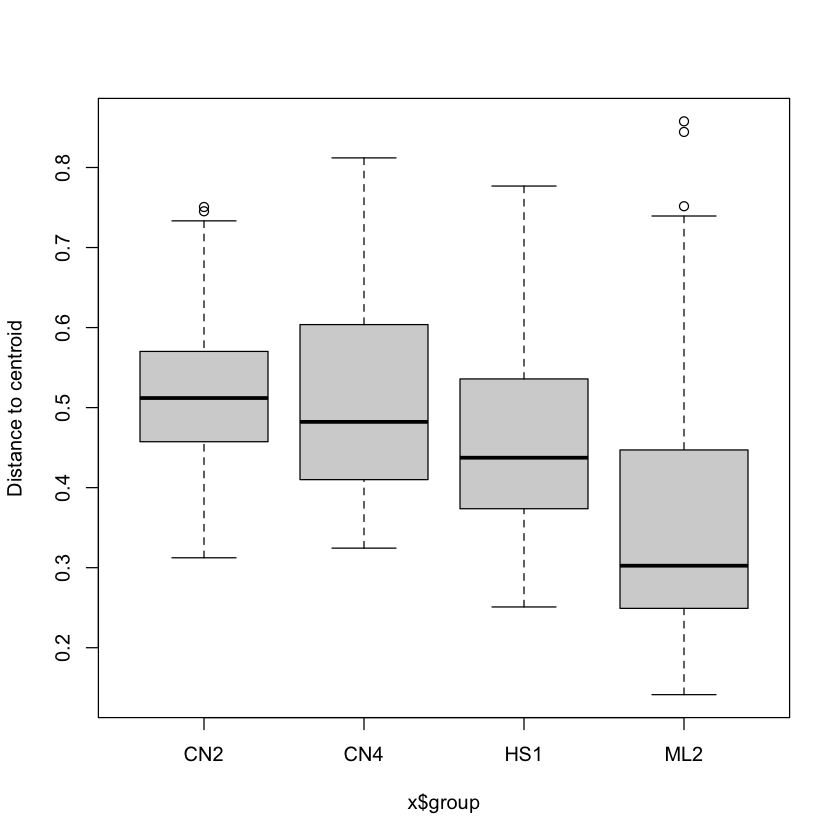

In [16]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 


#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)






Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


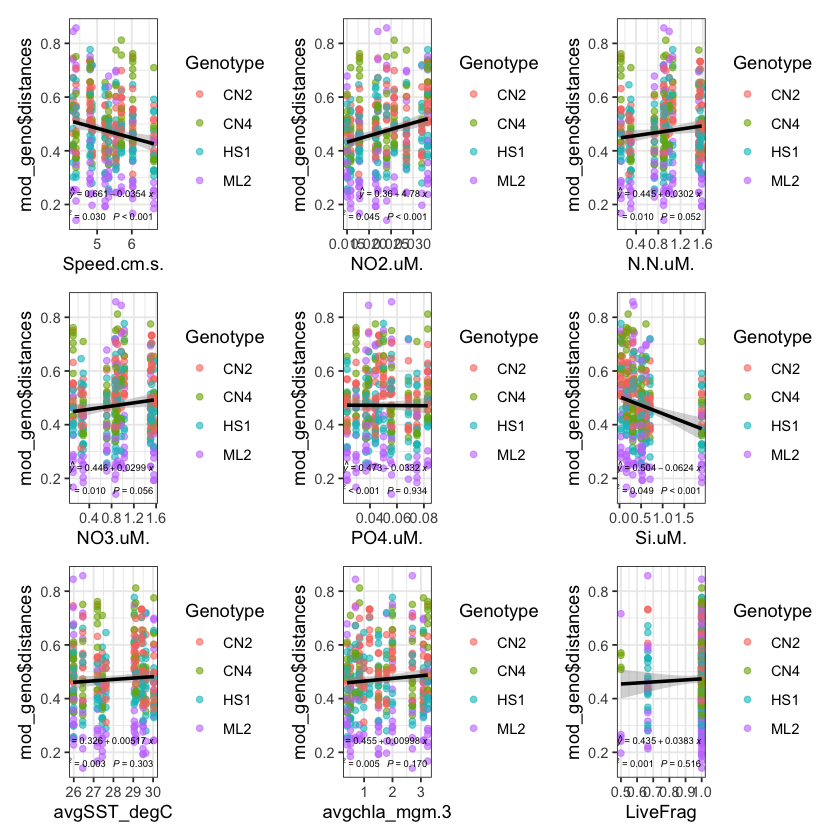

In [17]:
ps_ra_meta= as(sample_data(ps_ra), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")

y_columns <- names(ps_ra_meta_envs[4:12])
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes( x = .data[[y_var]],y = mod_geno$distances, color = Genotype)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [18]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)
head(mod_dist_geno)

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.1970187
bagnumber-1010,0.2417280
bagnumber-1011,0.7161369
bagnumber-1013,0.3520990
bagnumber-1014,0.5083540
bagnumber-1015,0.5168324


[1] 363   1

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.1970187
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2417280
bagnumber-1011,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7161369
bagnumber-1013,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3520990
bagnumber-1014,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.5083540
bagnumber-1015,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.5168324


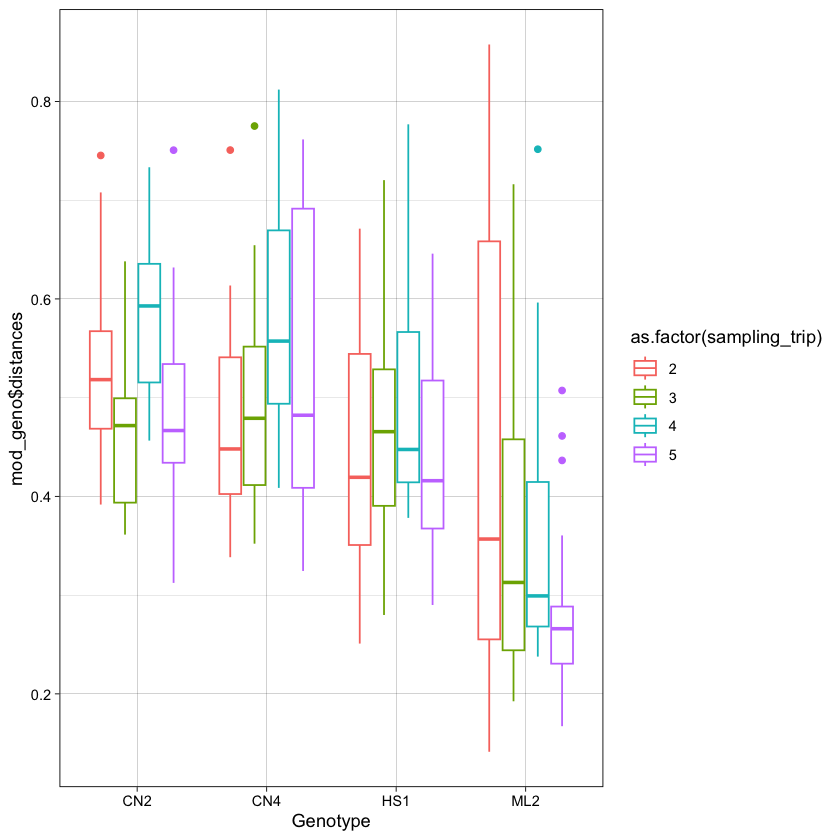

In [19]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)

mod_dist_geno_df=cbind(sample_data(ps_ra), mod_dist_geno) 
head(mod_dist_geno_df)



ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=as.factor(sampling_trip))) +
theme_linedraw() 

In [20]:
dates <- unique(sort(mod_dist_geno_df$collection_date))
mod_dist_geno_df$collection_date <- factor(mod_dist_geno_df$collection_date,labels = dates, ordered = T)

In [21]:
head(mod_dist_geno_df)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.1970187
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2417280
bagnumber-1011,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7161369
bagnumber-1013,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3520990
bagnumber-1014,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.5083540
bagnumber-1015,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.5168324



	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$reef)

No. of Positive Eigenvalues: 144
No. of Negative Eigenvalues: 218

Average distance to median:
    cf    ndr     pr 
0.5161 0.5129 0.4813 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
21.924 15.059  9.879  6.897  6.329  5.284  4.002  3.448 

[1] 363   1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff         lwr         upr     p adj
ndr-cf -0.003249152 -0.04138403 0.034885726 0.9780796
pr-cf  -0.034833660 -0.07276628 0.003098961 0.0793828
pr-ndr -0.031584508 -0.06440160 0.001232585 0.0621231



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      2 0.0936 0.046791 3.4385    999  0.036 *
Residuals 360 4.8989 0.013608                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          cf      ndr    pr
cf           0.832000 0.021
ndr 0.842313          0.027
pr  0.025047 0.028277      

`geom_smooth()` using formula = 'y ~ x'


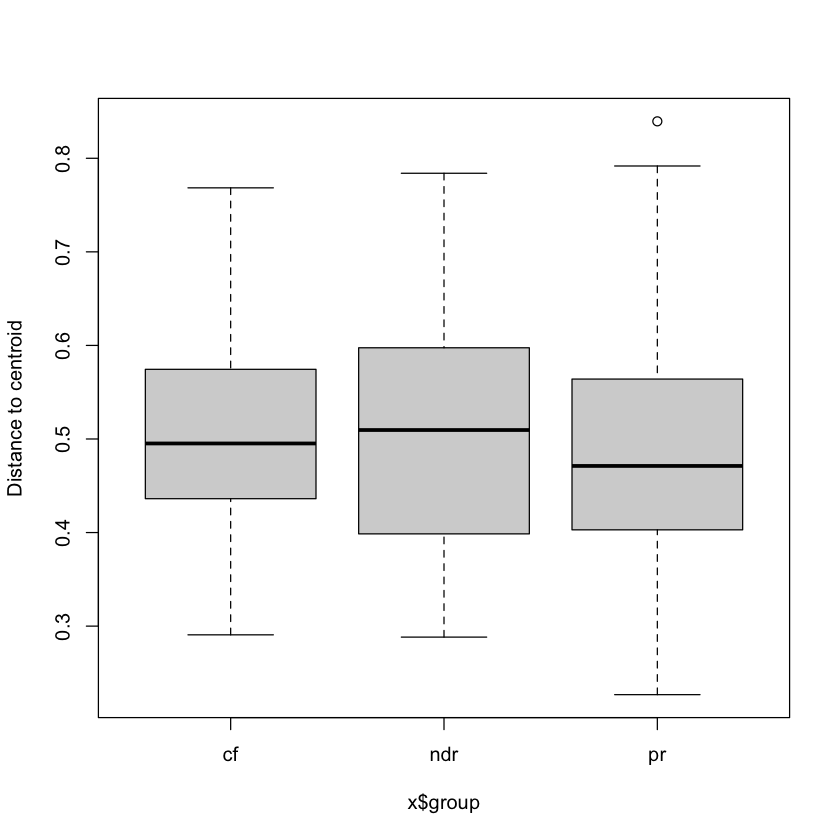

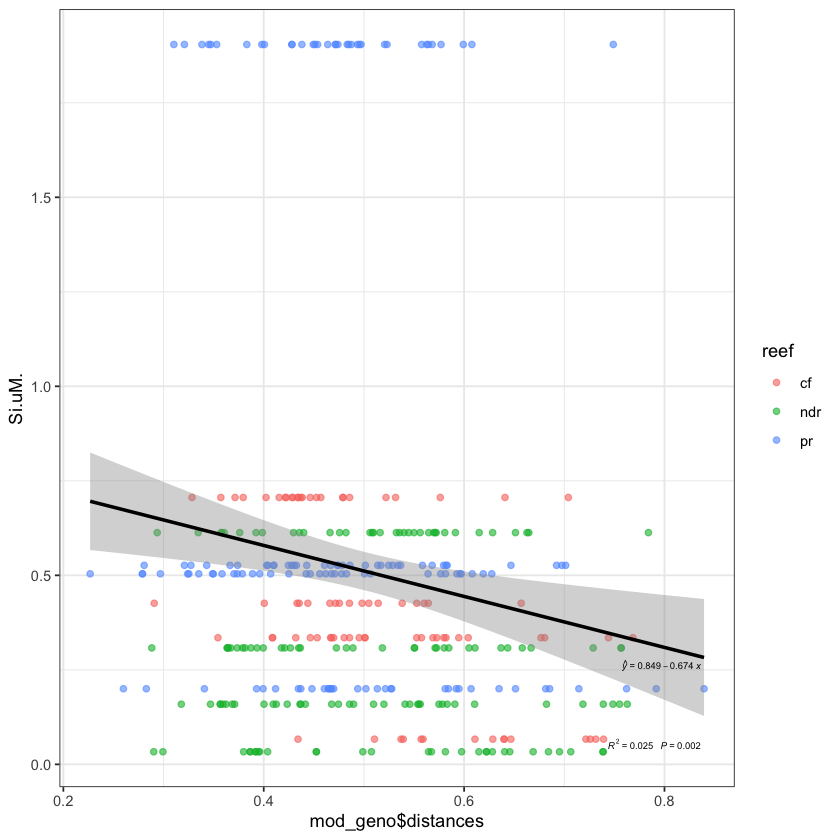

In [22]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$reef)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)



y_columns <- names(ps_ra_meta_envs[4:12])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


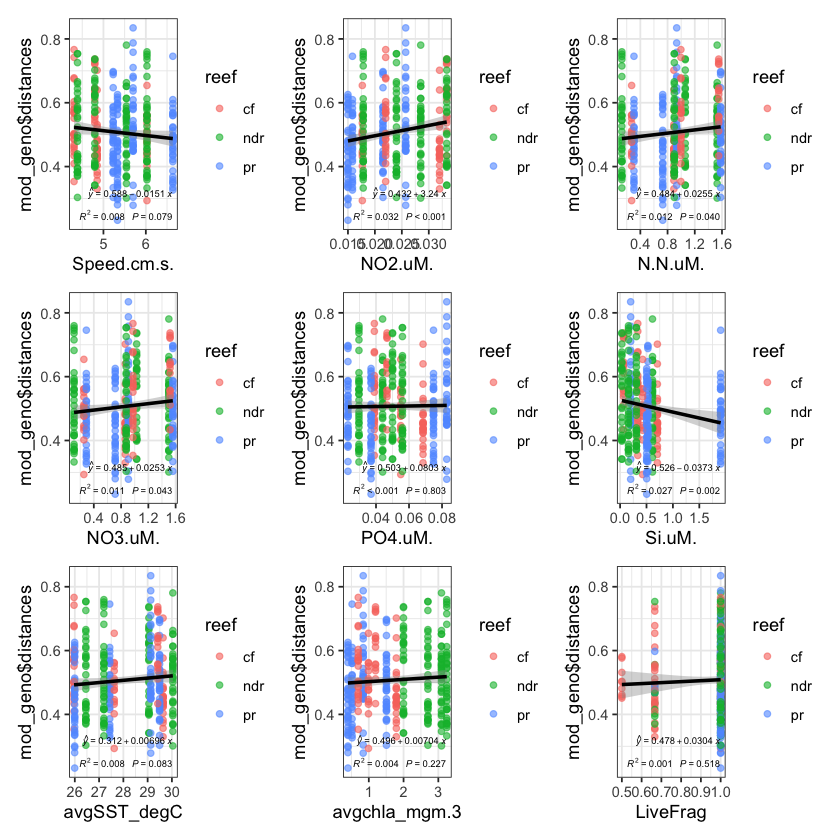

In [37]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes( x = .data[[y_var]], y = mod_geno$distances, color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)



	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Samp_trip)

No. of Positive Eigenvalues: 144
No. of Negative Eigenvalues: 218

Average distance to median:
Trip_2 Trip_3 Trip_4 Trip_5 
0.4849 0.4859 0.5307 0.4962 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
21.924 15.059  9.879  6.897  6.329  5.284  4.002  3.448 

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.3617699
bagnumber-1010,0.3734951
bagnumber-1011,0.5061981
bagnumber-1013,0.3944143
bagnumber-1014,0.5378841
bagnumber-1015,0.5568178


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                      diff           lwr        upr     p adj
Trip_3-Trip_2  0.001002354 -0.0421096614 0.04411437 0.9999223
Trip_4-Trip_2  0.045744342  0.0001262779 0.09136241 0.0490730
Trip_5-Trip_2  0.011238939 -0.0329440949 0.05542197 0.9131997
Trip_4-Trip_3  0.044741987 -0.0007714858 0.09025546 0.0560043
Trip_5-Trip_3  0.010236584 -0.0338384533 0.05431162 0.9321756
Trip_5-Trip_4 -0.034505403 -0.0810346499 0.01202384 0.2238989



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      3 0.1155 0.038493 2.8303    999  0.039 *
Residuals 359 4.8825 0.013600                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          Trip_2    Trip_3    Trip_4 Trip_5
Trip_2           0.9510000 0.0160000  0.535
Trip_3 0.9501839           0.0160000  0.515
Trip_4 0.0179042 0.0098461            0.077
Trip_5 0.5228906 0.5133087 0.0688793       

`geom_smooth()` using formula = 'y ~ x'


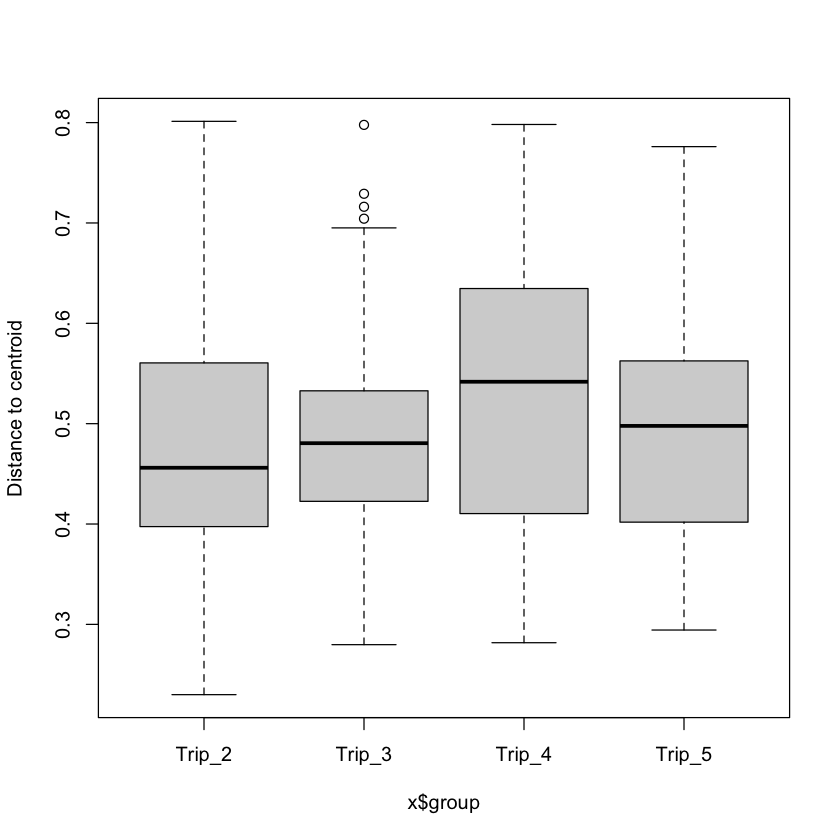

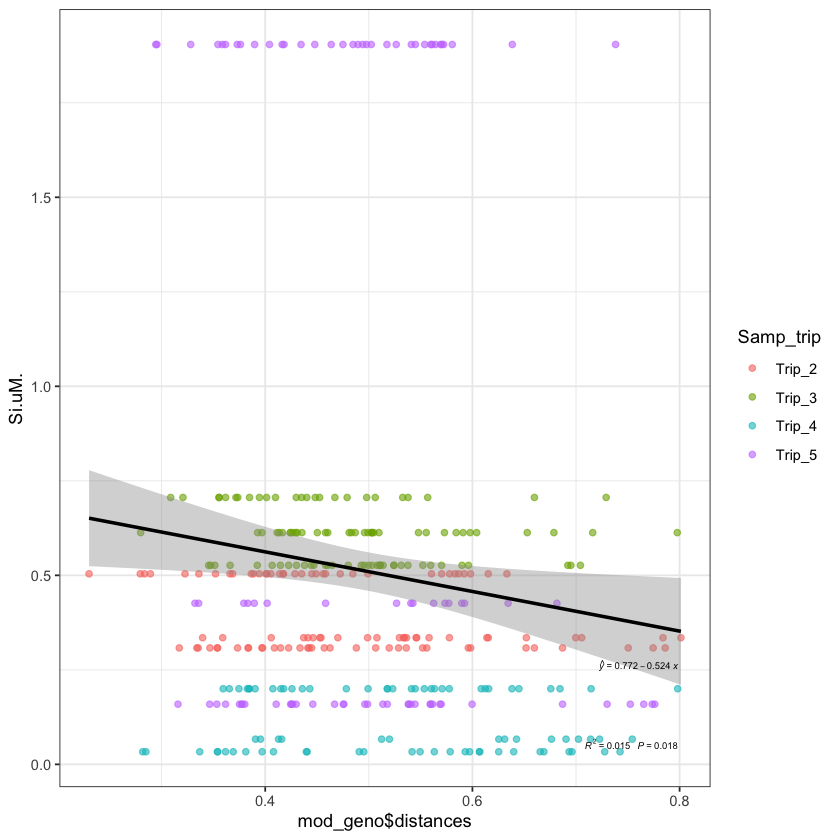

In [23]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Samp_trip)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 
head(mod_dist)

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)




y_columns <- names(ps_ra_meta_envs[4:12])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


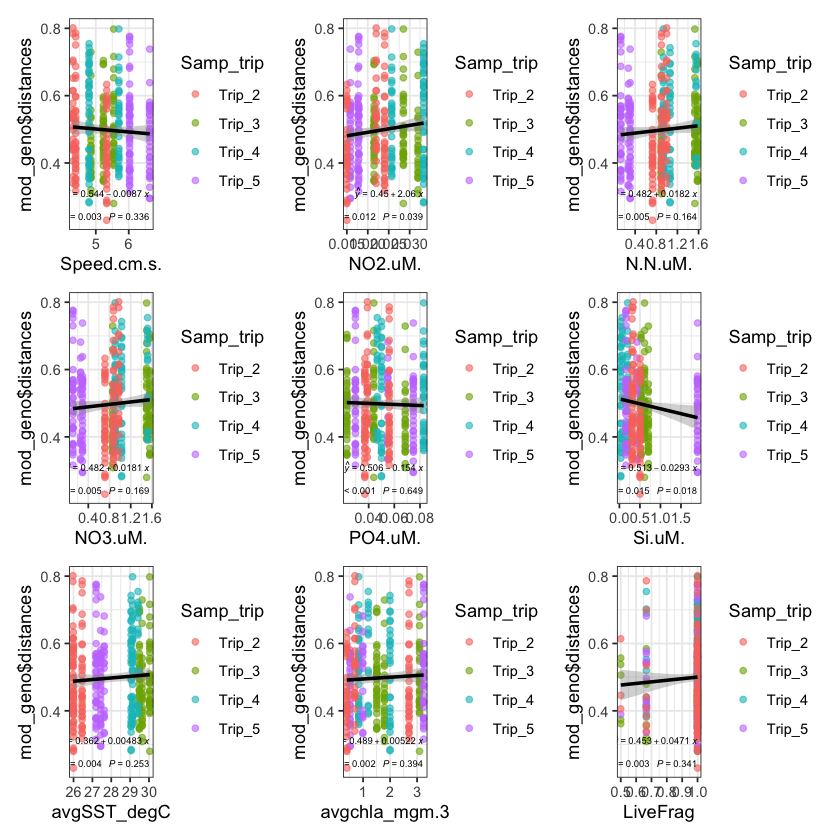

In [25]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = .data[[y_var]], y= mod_geno$distances, color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [26]:
ps_ra_df=as.data.frame(otu_table(ps_ra))
ps_ra_meta= as(sample_data(ps_ra), "data.frame")


In [27]:
  p <- pca(ps_ra_df, metadata =ps_ra_meta, 
           removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [ ]:
colnames(ps_ra_meta)

Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Samp_trip is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“reef is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Genotype is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.def

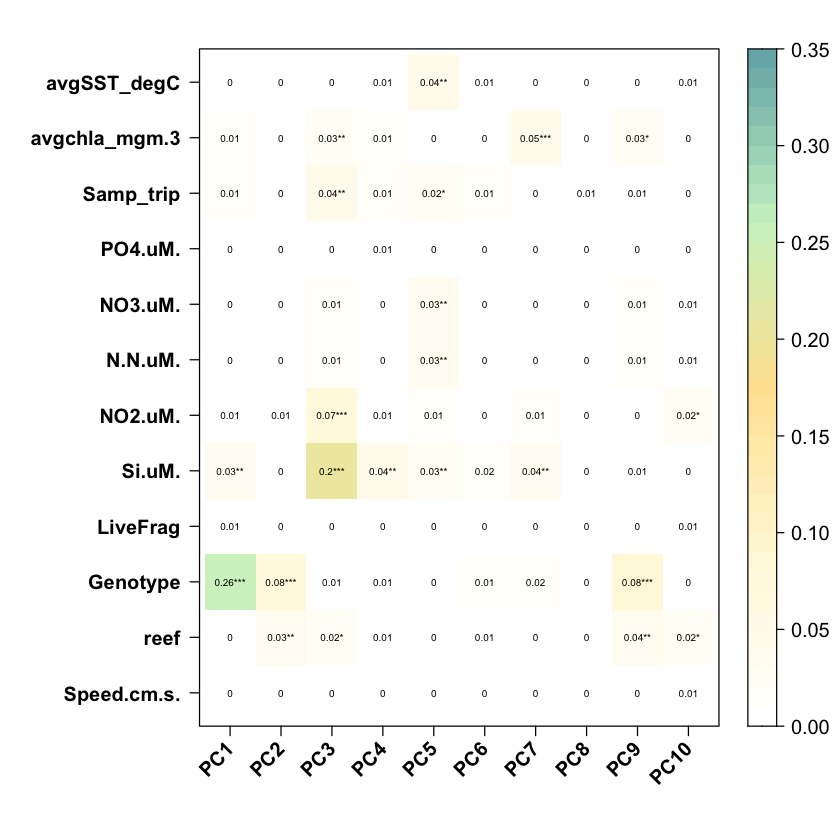

In [28]:
 eigencorplot(p,
    metavars = c('Si.uM.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', "Samp_trip", "avgchla_mgm.3", "reef", "Genotype",
                "Speed.cm.s.", "avgSST_degC",
                "LiveFrag"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [29]:
meta_envs= meta %>%
select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")
head(meta_envs, n=2)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619


In [ ]:
library("GGally")

Warning message in ggcorr(meta_envs, geom = "circle", nbreaks = 5):
“data in column(s) 'Genotype', 'Samp_trip', 'reef' are not numeric and were ignored”


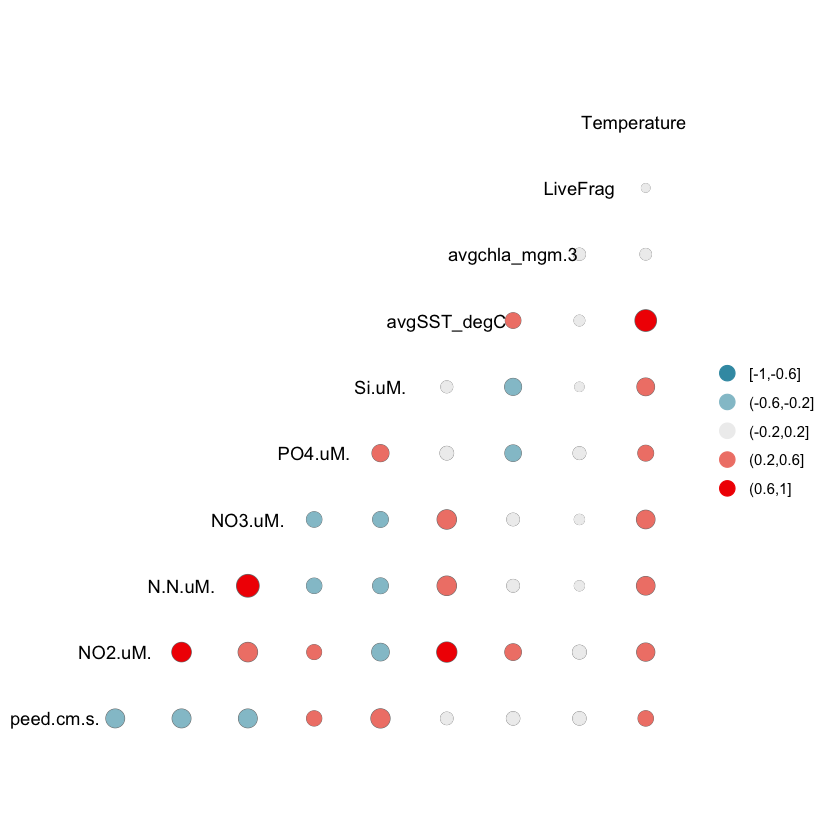

In [30]:
ggcorr(meta_envs, geom = "circle", nbreaks = 5)

In [31]:

#  adonis(formula = abund_table ~ ., data = meta_table) 

adonis2(ps_veg~., 
       data =meta_envs, 
         method = "bray", permutations = 999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,1.2157112,0.0122919929,1.6118662,0.032
Samp_trip,3,2.8792343,0.0291117879,3.8174694,0.001
reef,2,1.8095862,0.0182966321,3.5988944,0.001
Speed.cm.s.,1,1.0832380,0.0109525625,4.3086745,0.001
NO2.uM.,1,0.6375674,0.0064464110,2.5359806,0.008
N.N.uM.,1,2.9080400,0.0294030407,11.5669854,0.001
NO3.uM.,1,0.3308014,0.0033447157,1.3157917,0.207
PO4.uM.,1,0.4554275,0.0046048041,1.8115032,0.046
Si.uM.,1,0.0789096,0.0007978508,0.3138699,0.989


In [ ]:
adonis2(ps_veg~Genotype, 
       data =ps_ra_meta, permutations = 999, 
         method = "bray")

In [32]:
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")

In [33]:
dim(ps_ra_meta_envs)
head(ps_ra_meta_envs)

[1] 363  13

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1010,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1011,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1013,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,1.0,30.40801
bagnumber-1014,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1015,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801


In [34]:
dim(otu_table(ps_ra))

[1] 375 363

In [35]:
#find correlations in metadata
c1 <- cor(ps_ra_meta_envs[4:13])
c1

,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
Speed.cm.s.,1.00000000,-0.5264729,-0.52950334,-0.52710713,0.22879390,0.574997758,0.08343963,-0.12016822,0.1194374886,0.2407624984
NO2.uM.,-0.52647292,1.0000000,0.60372598,0.59562409,0.20578611,-0.411263133,0.68147710,0.33038031,-0.1466219001,0.4658315003
N.N.uM.,-0.52950334,0.6037260,1.00000000,0.99994785,-0.23913428,-0.267320218,0.59681623,0.09045020,0.0149358783,0.5048473507
NO3.uM.,-0.52710713,0.5956241,0.99994785,1.00000000,-0.24406894,-0.263970606,0.59245394,0.08694631,0.0169308223,0.5026963718
PO4.uM.,0.22879390,0.2057861,-0.23913428,-0.24406894,1.00000000,0.366359299,0.13338813,-0.32015226,-0.0950008525,0.2718520592
Si.uM.,0.57499776,-0.4112631,-0.26732022,-0.26397061,0.36635930,1.000000000,-0.05954307,-0.35869035,-0.0048927043,0.4247565632
avgSST_degC,0.08343963,0.6814771,0.59681623,0.59245394,0.13338813,-0.059543075,1.00000000,0.25505921,-0.0274256494,0.8565268145
avgchla_mgm.3,-0.12016822,0.3303803,0.09045020,0.08694631,-0.32015226,-0.358690355,0.25505921,1.00000000,0.0698891506,0.0475500589
LiveFrag,0.11943749,-0.1466219,0.01493588,0.01693082,-0.09500085,-0.004892704,-0.02742565,0.06988915,1.0000000000,0.0006665622
Temperature.C.,0.24076250,0.4658315,0.50484735,0.50269637,0.27185206,0.424756563,0.85652681,0.04755006,0.0006665622,1.0000000000


In [36]:
#remove co-variate
ps_ra_meta_envs2 = ps_ra_meta %>% select('NO2.uM.', 'N.N.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "LiveFrag")

In [37]:
#run ordistep for model selection
set.seed(43)
mod0 <- cca(t(otu_table(ps_ra)) ~ 1, ps_ra_meta_envs2)
# Model with all explanatory variables
mod1 <- cca(t(otu_table(ps_ra)) ~ ., ps_ra_meta_envs2)
## With scope present, the default direction is "both"
m <- ordistep(mod0, scope = formula(mod1), perm.max = 200, direction ="forward")
m


Start: t(otu_table(ps_ra)) ~ 1 

                Df    AIC      F Pr(>F)   
+ NO2.uM.        1 873.96 2.7694  0.005 **
+ avgchla_mgm.3  1 874.02 2.7176  0.005 **
+ avgSST_degC    1 874.70 2.0343  0.005 **
+ N.N.uM.        1 874.99 1.7438  0.005 **
+ Si.uM.         1 875.15 1.5809  0.055 . 
+ Speed.cm.s.    1 875.55 1.1845  0.170   
+ LiveFrag       1 875.84 0.8947  0.605   
+ PO4.uM.        1 875.83 0.9071  0.665   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: t(otu_table(ps_ra)) ~ NO2.uM. 

                Df    AIC      F Pr(>F)   
+ avgchla_mgm.3  1 873.16 2.7957  0.005 **
+ N.N.uM.        1 874.32 1.6307  0.015 * 
+ Speed.cm.s.    1 874.48 1.4703  0.040 * 
+ avgSST_degC    1 874.58 1.3773  0.055 . 
+ Si.uM.         1 874.95 1.0079  0.475   
+ PO4.uM.        1 875.02 0.9370  0.550   
+ LiveFrag       1 875.06 0.8994  0.565   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: t(otu_table(ps_ra)) ~ NO2.uM. + avgchla_mgm.3 

       

Call: cca(formula = t(otu_table(ps_ra)) ~ NO2.uM. + avgchla_mgm.3 +
Speed.cm.s. + Si.uM. + avgSST_degC + PO4.uM., data = ps_ra_meta_envs2)

               Inertia Proportion Rank
Total         11.06997    1.00000     
Constrained    0.36030    0.03255    6
Unconstrained 10.70967    0.96745  356
Inertia is scaled Chi-square 

Eigenvalues for constrained axes:
   CCA1    CCA2    CCA3    CCA4    CCA5    CCA6 
0.14005 0.09430 0.04315 0.03788 0.03164 0.01328 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6604 0.5624 0.5021 0.4843 0.4713 0.4551 0.4412 0.4182 
(Showing 8 of 356 unconstrained eigenvalues)


In [38]:
vif.cca(m)

NO2.uM. avgchla_mgm.3   Speed.cm.s.        Si.uM.   avgSST_degC 
    10.805026      1.652702      5.121904      1.930891      5.473249 
      PO4.uM. 
     2.591666

In [39]:
#cca ordination
cca_ps <- ordinate(
  physeq = ps_ra, 
  method = "CCA",
 distance = bray,
  formula =   ~ NO2.uM. + N.N.uM. + PO4.uM. + Si.uM. +
                Speed.cm.s. + avgSST_degC + avgchla_mgm.3)

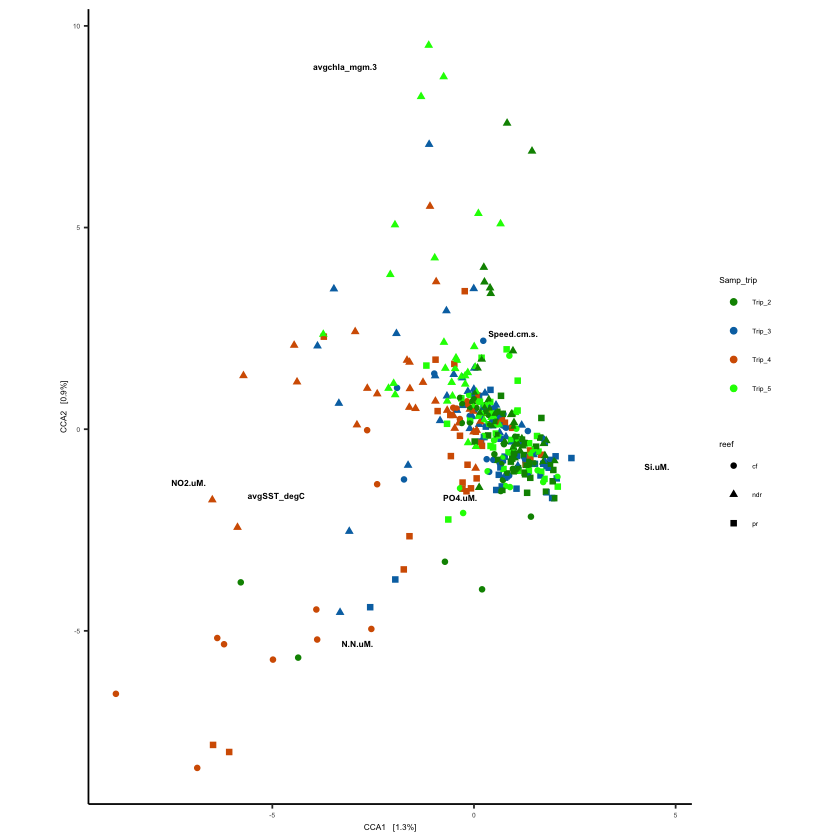

In [40]:
p0 = plot_ordination(ps_ra, cca_ps, color = "Samp_trip", shape ="reef") +
geom_point(size = 1) +
scale_color_manual(values=c("#009000", "#0072B2", "#D55E00", "green", "yellow", "pink"))
# Now add the environmental variables as arrows
arrowmat = vegan::scores(cca_ps, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 10 * CCA1, y = 11 * CCA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(1,"cm"))
p1 = p0 +
#geom_segment(arrow_map, size = 0.3, data = arrowdf, color = "black", 
 #   arrow = arrowhead) + 

geom_text(label_map, size = 1.8, data = arrowdf ,fontface = "bold", hjust=0.8, vjust=0.8, angle=0) +
theme_classic() +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
  coord_fixed() 
p1

#ggsave("/Users/stephanie.rosales/Desktop/fig.png",
 #      width = 4, height = 4, units = "in", dpi=300)